### 

### Reference

- Thieulot, C. (2014). ELEFANT: a user-friendly multipurpose geodynamics code. Solid Earth Discussions, 6(2), 1949-2096.

In [1]:
import underworld as uw
import underworld.function as fn
from underworld import UWGeodynamics as GEO
import numpy as np
import math

import os
import h5py   
import matplotlib.pyplot as plt

u = GEO.UnitRegistry

loaded rc file /opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
x_res,y_res = 50,50
fdir_output = "pp_Thieulot2014ELEFANT_StressBcs_Light_mid"

gravity = 1.

Model = GEO.Model(elementRes=(x_res, y_res),
                  minCoord=(0. , 0.),
                  maxCoord=(1., 1.),
                  gravity=(0.0, -gravity))
Model.outputDir=fdir_output
#Model.minStrainRate = 1e-18 / u.second

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"


In [3]:
ma1_Shape1 = fn.input()[0] < 0.375
ma1_Shape2 = fn.input()[0] > 0.625
ma1_Shape  = ma1_Shape1 | ma1_Shape2 
ma2_Shape = (fn.input()[0] >= 0.375) & (fn.input()[0] <= 0.625)
 

ma1 = Model.add_material(name="Material 1", shape=ma1_Shape)
ma2 = Model.add_material(name="Material 2", shape=ma2_Shape) 


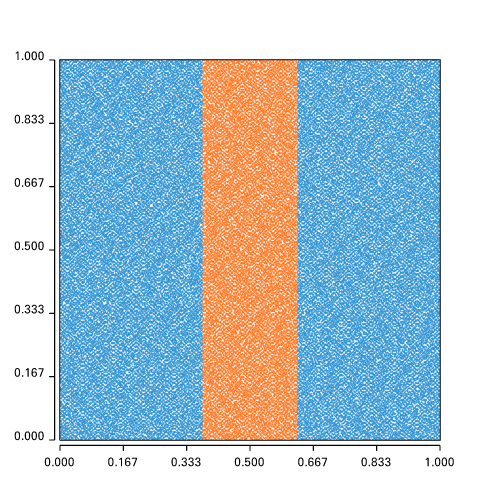

In [4]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelSetup.png")

In [5]:
ma1.density =  1.
ma2.density =  0.95


Model.minViscosity = 1.
Model.maxViscosity = 1e4

ma1.viscosity      = 1.
ma2.viscosity      = 1e4

Model.init_model()

/opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/_model.py:1584: UserWarning: Skipping the steady state calculation: No diffusivity variable defined on Model
  warnings.warn("Skipping the steady state calculation: No diffusivity variable defined on Model")


In [6]:
# tmp1 = uw.utils.Integral(fn=Model._densityFn*GEO.nd(gravity),mesh=Model.mesh, integrationType='volume')
# tmp2 = uw.utils.Integral(fn=1.,mesh=Model.mesh, integrationType='Surface',surfaceIndexSet=Model.bottom_wall)
# pbot = tmp1.evaluate()[0]/(tmp2.evaluate()[0])  # pbot = 1.0125000000001649

pbot = 1.

In [7]:
Model.set_velocityBCs(left = [0.,0.],right=[0., 0.])
Model.set_stressBCs(bottom=[None,pbot])


Model.freeSurface = True

Model.solver.set_inner_method("mg")
Model.solver.set_penalty(1e-4)

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50


In [8]:
Model.temperatureDot = Model._temperatureDot

Total_Time = 150
checkpoint_interval=checkpoint_interval = 10
dt = 0.1

#Model.run_for(nstep=1500, checkpoint_interval=10,dt=0.1)
Model.run_for(Total_Time, checkpoint_interval=checkpoint_interval,dt=dt)

Options:  -Q22_pc_type gkgdiag -force_correction True -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type fgmres -A11_ksp_rtol 1e-05 -scr_ksp_type fgmres -scr_ksp_rtol 1e-05
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002434 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18540e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001279 secs 
  RHS V Solve:            = 0.003273 secs / 7 its
  Pressure Solve:         = 0.109 secs / 28 its
  Final V Solve:          = 0.003418 secs / 7 its

  Total BSSCR Linear solve time: 0.129015 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.296476e-01 (secs)
Time Integration
	2nd order:      

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0787 [min] /    0.0787 [max] (secs)
Time Integration - 0.0786928 [min] / 0.0786928 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.068899e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:     7 Model Time: 255.7 day dt: 36.5 day (2023-06-03 05:44:50)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002174 seconds

SROpGenerator_SimpleFinestLevel: time = 1.04320e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00112 secs 
  RHS V Solve:            = 0.003013 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003899 seconds

SROpGenerator_SimpleFinestLevel: time = 3.10516e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0033 secs 
  RHS V Solve:            = 0.01122 secs / 7 its
  Pressure Solve:         = 0.2711 secs / 28 its
  Final V Solve:          = 0.004483 secs / 7 its

  Total BSSCR Linear solve time: 0.316355 seconds

Linear solver (99V6QD7M__system-execute), solution time 3.167281e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.1108 [min] /    0.1108 [max] (secs)
Time Integration - 0.110818 [min] / 0.110818 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 6.856562e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	don

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:    20 Model Time: 2.0 year dt: 36.5 day (2023-06-03 05:45:08)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002428 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20108e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001296 secs 
  RHS V Solve:            = 0.003355 secs / 7 its
  Pressure Solve:         = 0.108 secs / 28 its
  Final V Solve:          = 0.003351 secs / 7 its

  Total BSSCR Linear solve time: 0.127751 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.280311e-01 (secs)
Time Integration
	2nd order:                 FUG5JL

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0734 [min] /    0.0734 [max] (secs)
Time Integration - 0.0733898 [min] / 0.0733898 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.212782e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:    27 Model Time: 2.7 year dt: 36.5 day (2023-06-03 05:45:12)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002288 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21300e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0013 secs 
  RHS V Solve:            = 0.003293 secs /

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002180 seconds

SROpGenerator_SimpleFinestLevel: time = 1.10061e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001189 secs 
  RHS V Solve:            = 0.003218 secs / 7 its
  Pressure Solve:         = 0.09276 secs / 28 its
  Final V Solve:          = 0.003281 secs / 7 its

  Total BSSCR Linear solve time: 0.111533 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.118198e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0736 [min] /    0.0736 [max] (secs)
Time Integration - 0.0736046 [min] / 0.0736046 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.286258e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:    40 Model Time: 4.0 year dt: 36.5 day (2023-06-03 05:45:26)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002441 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31866e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001407 secs 
  RHS V Solve:            = 0.003765 secs / 7 its
  Pressure Solve:         = 0.1213 secs / 28 its
  Final V Solve:          = 0.003236 secs / 7 its

  Total BSSCR Linear solve time: 0.141964 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.422697e-01 (secs)
Time Integration
	2nd order:                 FUG5J

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0728 [min] /    0.0728 [max] (secs)
Time Integration - 0.072818 [min] / 0.072818 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.178543e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:    47 Model Time: 4.7 year dt: 36.5 day (2023-06-03 05:45:32)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002318 seconds

SROpGenerator_SimpleFinestLevel: time = 1.12002e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00121 secs 
  RHS V Solve:            = 0.00322 secs / 7

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002586 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25939e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00135 secs 
  RHS V Solve:            = 0.003393 secs / 7 its
  Pressure Solve:         = 0.09311 secs / 28 its
  Final V Solve:          = 0.003255 secs / 7 its

  Total BSSCR Linear solve time: 0.113310 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.136119e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0794 [min] /    0.0794 [max] (secs)
Time Integration - 0.0793834 [min] / 0.0793834 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.386109e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:    60 Model Time: 6.0 year dt: 36.5 day (2023-06-03 05:45:46)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002474 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24557e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001342 secs 
  RHS V Solve:            = 0.003434 secs / 7 its
  Pressure Solve:         = 0.09961 secs / 28 its
  Final V Solve:          = 0.003235 secs / 7 its

  Total BSSCR Linear solve time: 0.119646 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.199342e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0795 [min] /    0.0795 [max] (secs)
Time Integration - 0.0795387 [min] / 0.0795387 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.371033e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:    67 Model Time: 6.7 year dt: 36.5 day (2023-06-03 05:45:51)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002288 seconds

SROpGenerator_SimpleFinestLevel: time = 1.15528e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00124 secs 
  RHS V Solve:            = 0.00291 secs /

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002631 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25986e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00135 secs 
  RHS V Solve:            = 0.004013 secs / 7 its
  Pressure Solve:         = 0.1017 secs / 28 its
  Final V Solve:          = 0.003576 secs / 7 its

  Total BSSCR Linear solve time: 0.123269 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.235888e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0782 [min] /    0.0782 [max] (secs)
Time Integration - 0.0782762 [min] / 0.0782762 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.407089e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:    80 Model Time: 8.0 year dt: 36.5 day (2023-06-03 05:46:05)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002499 seconds

SROpGenerator_SimpleFinestLevel: time = 1.11902e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001202 secs 
  RHS V Solve:            = 0.003378 secs / 7 its
  Pressure Solve:         = 0.09625 secs / 29 its
  Final V Solve:          = 0.003473 secs / 7 its

  Total BSSCR Linear solve time: 0.115562 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.158564e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0823 [min] /    0.0823 [max] (secs)
Time Integration - 0.0823867 [min] / 0.0823867 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.515821e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:    87 Model Time: 8.7 year dt: 36.5 day (2023-06-03 05:46:11)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002515 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22241e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001315 secs 
  RHS V Solve:            = 0.003806 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002546 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25498e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00136 secs 
  RHS V Solve:            = 0.003852 secs / 8 its
  Pressure Solve:         = 0.1196 secs / 28 its
  Final V Solve:          = 0.005611 secs / 7 its

  Total BSSCR Linear solve time: 0.142891 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.432901e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0814 [min] /    0.0814 [max] (secs)
Time Integration - 0.0813866 [min] / 0.0813866 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.389478e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   100 Model Time: 10.0 year dt: 36.5 day (2023-06-03 05:46:26)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002408 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21109e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001298 secs 
  RHS V Solve:            = 0.003846 secs / 8 its
  Pressure Solve:         = 0.09031 secs / 28 its
  Final V Solve:          = 0.00311 secs / 7 its

  Total BSSCR Linear solve time: 0.110408 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.107453e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0796 [min] /    0.0796 [max] (secs)
Time Integration - 0.0795812 [min] / 0.0795812 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.476729e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   107 Model Time: 10.7 year dt: 36.5 day (2023-06-03 05:46:31)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002903 seconds

SROpGenerator_SimpleFinestLevel: time = 1.61033e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001714 secs 
  RHS V Solve:            = 0.003819 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005581 seconds

SROpGenerator_SimpleFinestLevel: time = 2.31077e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002508 secs 
  RHS V Solve:            = 0.01446 secs / 8 its
  Pressure Solve:         = 0.1521 secs / 28 its
  Final V Solve:          = 0.00614 secs / 7 its

  Total BSSCR Linear solve time: 0.199765 seconds

Linear solver (99V6QD7M__system-execute), solution time 2.002666e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0860 [min] /    0.0860 [max] (secs)
Time Integration - 0.0860188 [min] / 0.0860188 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.455292e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   120 Model Time: 12.0 year dt: 36.5 day (2023-06-03 05:46:50)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003259 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22437e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001333 secs 
  RHS V Solve:            = 0.004661 secs / 8 its
  Pressure Solve:         = 0.1388 secs

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0818 [min] /    0.0818 [max] (secs)
Time Integration - 0.0818898 [min] / 0.0818898 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.521641e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   127 Model Time: 12.7 year dt: 36.5 day (2023-06-03 05:46:57)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002492 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17997e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001283 secs 
  RHS V Solve:            = 0.005585 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002778 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39898e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001524 secs 
  RHS V Solve:            = 0.005608 secs / 8 its
  Pressure Solve:         = 0.119 secs / 28 its
  Final V Solve:          = 0.003669 secs / 7 its

  Total BSSCR Linear solve time: 0.144187 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.445458e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0852 [min] /    0.0852 [max] (secs)
Time Integration - 0.0852767 [min] / 0.0852767 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.567075e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   140 Model Time: 14.0 year dt: 36.5 day (2023-06-03 05:47:13)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002762 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33337e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001467 secs 
  RHS V Solve:            = 0.00558 secs / 8 its
  Pressure Solve:         = 0.107 secs / 28 its
  Final V Solve:          = 0.003727 secs / 7 its

  Total BSSCR Linear solve time: 0.131704 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.320566e-01 (secs)
Time Integration
	2nd order:                 FUG5JL

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0863 [min] /    0.0863 [max] (secs)
Time Integration - 0.0863476 [min] / 0.0863476 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.609294e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   147 Model Time: 14.7 year dt: 36.5 day (2023-06-03 05:47:20)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002678 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30679e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001418 secs 
  RHS V Solve:            = 0.005725 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002895 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35864e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00149 secs 
  RHS V Solve:            = 0.005423 secs / 8 its
  Pressure Solve:         = 0.1238 secs / 28 its
  Final V Solve:          = 0.003842 secs / 7 its

  Total BSSCR Linear solve time: 0.148802 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.491807e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0869 [min] /    0.0869 [max] (secs)
Time Integration - 0.0869572 [min] / 0.0869572 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.695490e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   160 Model Time: 16.0 year dt: 36.5 day (2023-06-03 05:47:36)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002798 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35493e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001471 secs 
  RHS V Solve:            = 0.005574 secs / 8 its
  Pressure Solve:         = 0.1121 secs / 28 its
  Final V Solve:          = 0.003715 secs / 7 its

  Total BSSCR Linear solve time: 0.137024 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.373804e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0869 [min] /    0.0869 [max] (secs)
Time Integration - 0.0869222 [min] / 0.0869222 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.815266e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   167 Model Time: 16.7 year dt: 36.5 day (2023-06-03 05:47:42)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002818 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35122e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001458 secs 
  RHS V Solve:            = 0.005754 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002574 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32609e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00145 secs 
  RHS V Solve:            = 0.00535 secs / 8 its
  Pressure Solve:         = 0.118 secs / 28 its
  Final V Solve:          = 0.003584 secs / 7 its

  Total BSSCR Linear solve time: 0.142156 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.425755e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0860 [min] /    0.0860 [max] (secs)
Time Integration - 0.0860659 [min] / 0.0860659 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.657087e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   180 Model Time: 18.0 year dt: 36.5 day (2023-06-03 05:47:59)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002780 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35779e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00149 secs 
  RHS V Solve:            = 0.005669 secs / 8 its
  Pressure Solve:         = 0.1178 secs / 28 its
  Final V Solve:          = 0.003684 secs / 7 its

  Total BSSCR Linear solve time: 0.143087 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.434898e-01 (secs)
Time Integration
	2nd order:                 FUG5J

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0862 [min] /    0.0862 [max] (secs)
Time Integration - 0.0862837 [min] / 0.0862837 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.536639e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   187 Model Time: 18.7 year dt: 36.5 day (2023-06-03 05:48:05)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002799 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37798e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001496 secs 
  RHS V Solve:            = 0.005259 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002860 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33413e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00146 secs 
  RHS V Solve:            = 0.005332 secs / 8 its
  Pressure Solve:         = 0.1478 secs / 28 its
  Final V Solve:          = 0.003672 secs / 7 its

  Total BSSCR Linear solve time: 0.172850 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.732238e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0879 [min] /    0.0879 [max] (secs)
Time Integration - 0.0879031 [min] / 0.0879031 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.613995e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   200 Model Time: 20.0 year dt: 36.5 day (2023-06-03 05:48:22)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002890 seconds

SROpGenerator_SimpleFinestLevel: time = 1.90043e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002021 secs 
  RHS V Solve:            = 0.004463 secs / 8 its
  Pressure Solve:         = 0.1059 secs / 28 its
  Final V Solve:          = 0.003657 secs / 7 its

  Total BSSCR Linear solve time: 0.129509 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.298850e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0883 [min] /    0.0883 [max] (secs)
Time Integration - 0.0883103 [min] / 0.0883103 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.676381e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   207 Model Time: 20.7 year dt: 36.5 day (2023-06-03 05:48:28)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002855 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33035e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00144 secs 
  RHS V Solve:            = 0.005741 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002833 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31959e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001446 secs 
  RHS V Solve:            = 0.005696 secs / 8 its
  Pressure Solve:         = 0.1215 secs / 28 its
  Final V Solve:          = 0.003983 secs / 7 its

  Total BSSCR Linear solve time: 0.147201 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.476162e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0875 [min] /    0.0875 [max] (secs)
Time Integration - 0.087499 [min] / 0.087499 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.718133e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   220 Model Time: 22.0 year dt: 36.5 day (2023-06-03 05:48:45)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002811 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34526e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001471 secs 
  RHS V Solve:            = 0.005795 secs / 8 its
  Pressure Solve:         = 0.1284 secs / 28 its
  Final V Solve:          = 0.003955 secs / 7 its

  Total BSSCR Linear solve time: 0.154038 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.544648e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0892 [min] /    0.0892 [max] (secs)
Time Integration - 0.0892499 [min] / 0.0892499 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.749397e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   227 Model Time: 22.7 year dt: 36.5 day (2023-06-03 05:48:51)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002809 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35675e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0015 secs 
  RHS V Solve:            = 0.005705 secs 

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002788 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41013e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001519 secs 
  RHS V Solve:            = 0.005684 secs / 8 its
  Pressure Solve:         = 0.1195 secs / 28 its
  Final V Solve:          = 0.003729 secs / 7 its

  Total BSSCR Linear solve time: 0.144880 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.453236e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0880 [min] /    0.0880 [max] (secs)
Time Integration - 0.0880757 [min] / 0.0880757 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.835919e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   240 Model Time: 24.0 year dt: 36.5 day (2023-06-03 05:49:09)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002898 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38110e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001506 secs 
  RHS V Solve:            = 0.005779 secs / 8 its
  Pressure Solve:         = 0.1232 secs / 28 its
  Final V Solve:          = 0.003849 secs / 7 its

  Total BSSCR Linear solve time: 0.149108 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.495098e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0865 [min] /    0.0865 [max] (secs)
Time Integration - 0.0865153 [min] / 0.0865153 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.679291e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   247 Model Time: 24.7 year dt: 36.5 day (2023-06-03 05:49:15)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002761 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37266e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001486 secs 
  RHS V Solve:            = 0.004643 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002823 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34507e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001464 secs 
  RHS V Solve:            = 0.004811 secs / 7 its
  Pressure Solve:         = 0.1293 secs / 29 its
  Final V Solve:          = 0.003794 secs / 7 its

  Total BSSCR Linear solve time: 0.153939 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.543520e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0870 [min] /    0.0870 [max] (secs)
Time Integration - 0.0870246 [min] / 0.0870246 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.729435e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   260 Model Time: 26.0 year dt: 36.5 day (2023-06-03 05:49:32)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002855 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47910e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001597 secs 
  RHS V Solve:            = 0.005056 secs / 7 its
  Pressure Solve:         = 0.1295 secs / 29 its
  Final V Solve:          = 0.004083 secs / 7 its

  Total BSSCR Linear solve time: 0.154923 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.553252e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0887 [min] /    0.0887 [max] (secs)
Time Integration - 0.0887778 [min] / 0.0887778 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.761570e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   267 Model Time: 26.7 year dt: 36.5 day (2023-06-03 05:49:38)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002904 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44811e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001564 secs 
  RHS V Solve:            = 0.004985 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002878 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46110e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001583 secs 
  RHS V Solve:            = 0.004911 secs / 7 its
  Pressure Solve:         = 0.1431 secs / 29 its
  Final V Solve:          = 0.005686 secs / 7 its

  Total BSSCR Linear solve time: 0.169935 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.703632e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0877 [min] /    0.0877 [max] (secs)
Time Integration - 0.0876836 [min] / 0.0876836 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.680135e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   280 Model Time: 28.0 year dt: 36.5 day (2023-06-03 05:49:55)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002828 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41061e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001521 secs 
  RHS V Solve:            = 0.005261 secs / 7 its
  Pressure Solve:         = 0.1285 secs / 29 its
  Final V Solve:          = 0.003839 secs / 7 its

  Total BSSCR Linear solve time: 0.153580 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.539950e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0884 [min] /    0.0884 [max] (secs)
Time Integration - 0.0884365 [min] / 0.0884365 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.680332e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   287 Model Time: 28.7 year dt: 36.5 day (2023-06-03 05:50:01)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002814 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41250e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001529 secs 
  RHS V Solve:            = 0.004829 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002835 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45968e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001575 secs 
  RHS V Solve:            = 0.004862 secs / 7 its
  Pressure Solve:         = 0.1311 secs / 28 its
  Final V Solve:          = 0.003843 secs / 7 its

  Total BSSCR Linear solve time: 0.156061 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.564685e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0881 [min] /    0.0881 [max] (secs)
Time Integration - 0.0880856 [min] / 0.0880856 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.652487e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   300 Model Time: 30.0 year dt: 36.5 day (2023-06-03 05:50:18)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002973 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41404e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00153 secs 
  RHS V Solve:            = 0.004745 secs / 7 its
  Pressure Solve:         = 0.1182 secs / 28 its
  Final V Solve:          = 0.00396 secs / 7 its

  Total BSSCR Linear solve time: 0.143183 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.436211e-01 (secs)
Time Integration
	2nd order:                 FUG5JL

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0970 [min] /    0.0970 [max] (secs)
Time Integration - 0.0970026 [min] / 0.0970026 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.574148e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   307 Model Time: 30.7 year dt: 36.5 day (2023-06-03 05:50:25)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002907 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40790e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001518 secs 
  RHS V Solve:            = 0.004697 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002594 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35247e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001467 secs 
  RHS V Solve:            = 0.004808 secs / 7 its
  Pressure Solve:         = 0.1337 secs / 28 its
  Final V Solve:          = 0.004071 secs / 7 its

  Total BSSCR Linear solve time: 0.157998 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.584025e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0888 [min] /    0.0888 [max] (secs)
Time Integration - 0.0888627 [min] / 0.0888627 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.649120e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   320 Model Time: 32.0 year dt: 36.5 day (2023-06-03 05:50:42)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002862 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34243e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001466 secs 
  RHS V Solve:            = 0.005044 secs / 7 its
  Pressure Solve:         = 0.1315 secs / 29 its
  Final V Solve:          = 0.0037 secs / 7 its

  Total BSSCR Linear solve time: 0.156136 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.565409e-01 (secs)
Time Integration
	2nd order:                 FUG5JL

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0886 [min] /    0.0886 [max] (secs)
Time Integration - 0.0886524 [min] / 0.0886524 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.756262e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   327 Model Time: 32.7 year dt: 36.5 day (2023-06-03 05:50:49)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002578 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28043e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001388 secs 
  RHS V Solve:            = 0.004764 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002896 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40293e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001521 secs 
  RHS V Solve:            = 0.004897 secs / 7 its
  Pressure Solve:         = 0.1304 secs / 28 its
  Final V Solve:          = 0.003995 secs / 7 its

  Total BSSCR Linear solve time: 0.155530 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.559618e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0967 [min] /    0.0967 [max] (secs)
Time Integration - 0.0967334 [min] / 0.0967334 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.675466e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   340 Model Time: 34.0 year dt: 36.5 day (2023-06-03 05:51:06)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002871 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41212e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001526 secs 
  RHS V Solve:            = 0.005 secs / 7 its
  Pressure Solve:         = 0.1294 secs / 28 its
  Final V Solve:          = 0.003948 secs / 7 its

  Total BSSCR Linear solve time: 0.154869 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.552625e-01 (secs)
Time Integration
	2nd order:                 FUG5JLD

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0865 [min] /    0.0865 [max] (secs)
Time Integration - 0.0865481 [min] / 0.0865481 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.770965e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   347 Model Time: 34.7 year dt: 36.5 day (2023-06-03 05:51:13)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002975 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47835e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001591 secs 
  RHS V Solve:            = 0.004078 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002552 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26986e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001375 secs 
  RHS V Solve:            = 0.004707 secs / 7 its
  Pressure Solve:         = 0.1327 secs / 28 its
  Final V Solve:          = 0.004391 secs / 7 its

  Total BSSCR Linear solve time: 0.156548 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.569349e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0870 [min] /    0.0870 [max] (secs)
Time Integration - 0.0869958 [min] / 0.0869958 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.877177e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   360 Model Time: 36.0 year dt: 36.5 day (2023-06-03 05:51:30)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002960 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43327e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001556 secs 
  RHS V Solve:            = 0.004938 secs / 7 its
  Pressure Solve:         = 0.1246 secs / 28 its
  Final V Solve:          = 0.003967 secs / 7 its

  Total BSSCR Linear solve time: 0.149724 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.502028e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0882 [min] /    0.0882 [max] (secs)
Time Integration - 0.0882534 [min] / 0.0882534 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.724922e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   367 Model Time: 36.7 year dt: 36.5 day (2023-06-03 05:51:37)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002628 seconds

SROpGenerator_SimpleFinestLevel: time = 1.20950e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001308 secs 
  RHS V Solve:            = 0.004652 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002418 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25259e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001373 secs 
  RHS V Solve:            = 0.005102 secs / 7 its
  Pressure Solve:         = 0.135 secs / 28 its
  Final V Solve:          = 0.003795 secs / 7 its

  Total BSSCR Linear solve time: 0.158654 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.590583e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0887 [min] /    0.0887 [max] (secs)
Time Integration - 0.0888022 [min] / 0.0888022 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.775280e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   380 Model Time: 38.0 year dt: 36.5 day (2023-06-03 05:51:54)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002943 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33268e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001442 secs 
  RHS V Solve:            = 0.005261 secs / 7 its
  Pressure Solve:         = 0.1239 secs / 28 its
  Final V Solve:          = 0.003759 secs / 7 its

  Total BSSCR Linear solve time: 0.148921 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.493807e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.0902557 [min] / 0.0902557 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.695281e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   387 Model Time: 38.7 year dt: 36.5 day (2023-06-03 05:52:00)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002894 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38927e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001494 secs 
  RHS V Solve:            = 0.004735 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002794 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47190e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001576 secs 
  RHS V Solve:            = 0.007965 secs / 7 its
  Pressure Solve:         = 0.1319 secs / 28 its
  Final V Solve:          = 0.00455 secs / 7 its

  Total BSSCR Linear solve time: 0.162924 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.633715e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0896 [min] /    0.0896 [max] (secs)
Time Integration - 0.0896583 [min] / 0.0896583 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.687649e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   400 Model Time: 40.0 year dt: 36.5 day (2023-06-03 05:52:17)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002842 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50888e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001643 secs 
  RHS V Solve:            = 0.005101 secs / 7 its
  Pressure Solve:         = 0.1411 secs / 28 its
  Final V Solve:          = 0.004005 secs / 7 its

  Total BSSCR Linear solve time: 0.166462 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.669460e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0894 [min] /    0.0894 [max] (secs)
Time Integration - 0.089385 [min] / 0.089385 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.814754e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   407 Model Time: 40.7 year dt: 36.5 day (2023-06-03 05:52:24)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002688 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28347e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001404 secs 
  RHS V Solve:            = 0.004922 secs 

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002844 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35878e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001471 secs 
  RHS V Solve:            = 0.004689 secs / 7 its
  Pressure Solve:         = 0.1384 secs / 29 its
  Final V Solve:          = 0.003813 secs / 7 its

  Total BSSCR Linear solve time: 0.163214 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.636608e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0899 [min] /    0.0899 [max] (secs)
Time Integration - 0.0899532 [min] / 0.0899532 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.746388e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   420 Model Time: 42.0 year dt: 36.5 day (2023-06-03 05:52:41)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002571 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33370e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001438 secs 
  RHS V Solve:            = 0.004618 secs / 7 its
  Pressure Solve:         = 0.1365 secs / 29 its
  Final V Solve:          = 0.003937 secs / 7 its

  Total BSSCR Linear solve time: 0.160546 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.609583e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0890 [min] /    0.0890 [max] (secs)
Time Integration - 0.0890749 [min] / 0.0890749 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.926561e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   427 Model Time: 42.7 year dt: 36.5 day (2023-06-03 05:52:48)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002643 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28186e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001385 secs 
  RHS V Solve:            = 0.00503 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002702 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33124e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001453 secs 
  RHS V Solve:            = 0.004831 secs / 7 its
  Pressure Solve:         = 0.1338 secs / 28 its
  Final V Solve:          = 0.003759 secs / 7 its

  Total BSSCR Linear solve time: 0.158694 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.591374e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0903 [min] /    0.0903 [max] (secs)
Time Integration - 0.090301 [min] / 0.090301 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.831009e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   440 Model Time: 44.0 year dt: 36.5 day (2023-06-03 05:53:05)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003060 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50344e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001637 secs 
  RHS V Solve:            = 0.005015 secs / 7 its
  Pressure Solve:         = 0.1366 secs / 28 its
  Final V Solve:          = 0.003822 secs / 7 its

  Total BSSCR Linear solve time: 0.161910 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.623840e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0908 [min] /    0.0908 [max] (secs)
Time Integration - 0.0907899 [min] / 0.0907899 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.729696e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   447 Model Time: 44.7 year dt: 36.5 day (2023-06-03 05:53:11)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002542 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26326e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001362 secs 
  RHS V Solve:            = 0.005026 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002891 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36387e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001467 secs 
  RHS V Solve:            = 0.005257 secs / 7 its
  Pressure Solve:         = 0.1344 secs / 28 its
  Final V Solve:          = 0.004665 secs / 7 its

  Total BSSCR Linear solve time: 0.160115 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.605707e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0873 [min] /    0.0873 [max] (secs)
Time Integration - 0.0873 [min] / 0.0873 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.871770e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   460 Model Time: 46.0 year dt: 36.5 day (2023-06-03 05:53:29)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003441 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33805e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001462 secs 
  RHS V Solve:            = 0.004792 secs / 7 its
  Pressure Solve:         = 0.1265 secs / 28 its
  Final V Solve:          = 0.003716 secs / 7 its

  Total BSSCR Linear solve time: 0.151986 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.525908e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0894 [min] /    0.0894 [max] (secs)
Time Integration - 0.0894085 [min] / 0.0894085 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.886740e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   467 Model Time: 46.7 year dt: 36.5 day (2023-06-03 05:53:35)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002888 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40636e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00154 secs 
  RHS V Solve:            = 0.004917 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002867 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40859e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001514 secs 
  RHS V Solve:            = 0.004751 secs / 7 its
  Pressure Solve:         = 0.1295 secs / 28 its
  Final V Solve:          = 0.004036 secs / 7 its

  Total BSSCR Linear solve time: 0.154357 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.548467e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0908 [min] /    0.0908 [max] (secs)
Time Integration - 0.0908514 [min] / 0.0908514 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.800451e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   480 Model Time: 48.0 year dt: 36.5 day (2023-06-03 05:53:52)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002928 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42275e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001535 secs 
  RHS V Solve:            = 0.004999 secs / 7 its
  Pressure Solve:         = 0.1302 secs / 28 its
  Final V Solve:          = 0.003955 secs / 7 its

  Total BSSCR Linear solve time: 0.155468 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.559047e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0894 [min] /    0.0894 [max] (secs)
Time Integration - 0.0894045 [min] / 0.0894045 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.743768e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   487 Model Time: 48.7 year dt: 36.5 day (2023-06-03 05:53:59)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002776 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37657e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001484 secs 
  RHS V Solve:            = 0.004915 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002820 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42167e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00153 secs 
  RHS V Solve:            = 0.004768 secs / 7 its
  Pressure Solve:         = 0.1337 secs / 28 its
  Final V Solve:          = 0.003718 secs / 7 its

  Total BSSCR Linear solve time: 0.158115 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.585777e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.091714 [min] / 0.091714 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.840431e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   500 Model Time: 50.0 year dt: 36.5 day (2023-06-03 05:54:16)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002875 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38789e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001502 secs 
  RHS V Solve:            = 0.004623 secs / 7 its
  Pressure Solve:         = 0.1305 secs / 28 its
  Final V Solve:          = 0.003956 secs / 7 its

  Total BSSCR Linear solve time: 0.155374 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.558552e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.092459 [min] / 0.092459 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.758515e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   507 Model Time: 50.7 year dt: 36.5 day (2023-06-03 05:54:23)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002877 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38395e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001509 secs 
  RHS V Solve:            = 0.004809 secs 

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002678 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37177e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001482 secs 
  RHS V Solve:            = 0.004969 secs / 7 its
  Pressure Solve:         = 0.1324 secs / 28 its
  Final V Solve:          = 0.004001 secs / 7 its

  Total BSSCR Linear solve time: 0.157014 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.575001e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0928 [min] /    0.0928 [max] (secs)
Time Integration - 0.092802 [min] / 0.092802 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.744804e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   520 Model Time: 52.0 year dt: 36.5 day (2023-06-03 05:54:40)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002900 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39470e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001508 secs 
  RHS V Solve:            = 0.005244 secs / 7 its
  Pressure Solve:         = 0.1336 secs / 28 its
  Final V Solve:          = 0.003864 secs / 7 its

  Total BSSCR Linear solve time: 0.159220 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.597013e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0891 [min] /    0.0891 [max] (secs)
Time Integration - 0.0890873 [min] / 0.0890873 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.795176e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   527 Model Time: 52.7 year dt: 36.5 day (2023-06-03 05:54:46)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002510 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21887e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001314 secs 
  RHS V Solve:            = 0.004672 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002540 seconds

SROpGenerator_SimpleFinestLevel: time = 1.17763e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001266 secs 
  RHS V Solve:            = 0.004827 secs / 7 its
  Pressure Solve:         = 0.1357 secs / 28 its
  Final V Solve:          = 0.004473 secs / 7 its

  Total BSSCR Linear solve time: 0.159819 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.602391e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.0894839 [min] / 0.0894839 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.721870e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   540 Model Time: 54.0 year dt: 36.5 day (2023-06-03 05:55:04)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002842 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35864e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001486 secs 
  RHS V Solve:            = 0.004801 secs / 7 its
  Pressure Solve:         = 0.1337 secs / 28 its
  Final V Solve:          = 0.004367 secs / 7 its

  Total BSSCR Linear solve time: 0.158724 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.591609e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0916 [min] /    0.0916 [max] (secs)
Time Integration - 0.0916476 [min] / 0.0916476 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.847784e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   547 Model Time: 54.7 year dt: 36.5 day (2023-06-03 05:55:11)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002950 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40222e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001512 secs 
  RHS V Solve:            = 0.005038 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002784 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32623e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001452 secs 
  RHS V Solve:            = 0.004951 secs / 7 its
  Pressure Solve:         = 0.1376 secs / 29 its
  Final V Solve:          = 0.003875 secs / 7 its

  Total BSSCR Linear solve time: 0.162110 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.625794e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917908 [min] / 0.0917908 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.853592e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   560 Model Time: 56.0 year dt: 36.5 day (2023-06-03 05:55:28)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002944 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38940e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001516 secs 
  RHS V Solve:            = 0.005151 secs / 7 its
  Pressure Solve:         = 0.1289 secs / 29 its
  Final V Solve:          = 0.004111 secs / 7 its

  Total BSSCR Linear solve time: 0.154485 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.550116e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.1220 [min] /    0.1220 [max] (secs)
Time Integration - 0.122039 [min] / 0.122039 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 4.230088e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   567 Model Time: 56.7 year dt: 36.5 day (2023-06-03 05:55:35)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004898 seconds

SROpGenerator_SimpleFinestLevel: time = 2.52021e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002683 secs 
  RHS V Solve:            = 0.004032 secs 

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002461 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21649e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001312 secs 
  RHS V Solve:            = 0.004866 secs / 7 its
  Pressure Solve:         = 0.1552 secs / 29 its
  Final V Solve:          = 0.005525 secs / 7 its

  Total BSSCR Linear solve time: 0.180914 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.813577e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.091279 [min] / 0.091279 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.918916e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   580 Model Time: 58.0 year dt: 36.5 day (2023-06-03 05:55:52)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002936 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49771e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001621 secs 
  RHS V Solve:            = 0.005366 secs / 7 its
  Pressure Solve:         = 0.1363 secs / 29 its
  Final V Solve:          = 0.004039 secs / 7 its

  Total BSSCR Linear solve time: 0.162095 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.625580e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0916 [min] /    0.0916 [max] (secs)
Time Integration - 0.0916422 [min] / 0.0916422 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.821319e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   587 Model Time: 58.7 year dt: 36.5 day (2023-06-03 05:55:59)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002514 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34572e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001472 secs 
  RHS V Solve:            = 0.004823 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002587 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19511e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001287 secs 
  RHS V Solve:            = 0.004946 secs / 7 its
  Pressure Solve:         = 0.1419 secs / 29 its
  Final V Solve:          = 0.003784 secs / 7 its

  Total BSSCR Linear solve time: 0.165803 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.662709e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.0902429 [min] / 0.0902429 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.772261e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   600 Model Time: 60.0 year dt: 36.5 day (2023-06-03 05:56:16)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002691 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25817e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001367 secs 
  RHS V Solve:            = 0.004769 secs / 7 its
  Pressure Solve:         = 0.1433 secs / 29 its
  Final V Solve:          = 0.003925 secs / 7 its

  Total BSSCR Linear solve time: 0.167093 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.676092e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.0902011 [min] / 0.0902011 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.812890e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   607 Model Time: 60.7 year dt: 36.5 day (2023-06-03 05:56:23)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002469 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25933e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001385 secs 
  RHS V Solve:            = 0.004775 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002572 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22896e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001334 secs 
  RHS V Solve:            = 0.004634 secs / 7 its
  Pressure Solve:         = 0.1435 secs / 29 its
  Final V Solve:          = 0.003885 secs / 7 its

  Total BSSCR Linear solve time: 0.166474 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.669178e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0980 [min] /    0.0980 [max] (secs)
Time Integration - 0.0980755 [min] / 0.0980755 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.651348e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   620 Model Time: 62.0 year dt: 36.5 day (2023-06-03 05:56:41)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003002 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40450e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001512 secs 
  RHS V Solve:            = 0.005064 secs / 7 its
  Pressure Solve:         = 0.1416 secs / 29 its
  Final V Solve:          = 0.003859 secs / 7 its

  Total BSSCR Linear solve time: 0.166941 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.674320e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0910 [min] /    0.0910 [max] (secs)
Time Integration - 0.0910013 [min] / 0.0910013 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.801726e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   627 Model Time: 62.7 year dt: 36.5 day (2023-06-03 05:56:47)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002645 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31845e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001458 secs 
  RHS V Solve:            = 0.005079 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002873 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42208e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001536 secs 
  RHS V Solve:            = 0.004757 secs / 7 its
  Pressure Solve:         = 0.1364 secs / 29 its
  Final V Solve:          = 0.004149 secs / 7 its

  Total BSSCR Linear solve time: 0.161708 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.621771e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.0909131 [min] / 0.0909131 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.841090e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   640 Model Time: 64.0 year dt: 36.5 day (2023-06-03 05:57:05)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002594 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22988e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001335 secs 
  RHS V Solve:            = 0.004823 secs / 7 its
  Pressure Solve:         = 0.1397 secs / 29 its
  Final V Solve:          = 0.004009 secs / 7 its

  Total BSSCR Linear solve time: 0.163410 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.638784e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0907 [min] /    0.0907 [max] (secs)
Time Integration - 0.0907524 [min] / 0.0907524 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.765162e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   647 Model Time: 64.7 year dt: 36.5 day (2023-06-03 05:57:11)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002911 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31392e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001415 secs 
  RHS V Solve:            = 0.004787 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002666 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38010e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00149 secs 
  RHS V Solve:            = 0.005232 secs / 7 its
  Pressure Solve:         = 0.1459 secs / 29 its
  Final V Solve:          = 0.005767 secs / 7 its

  Total BSSCR Linear solve time: 0.172626 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.731151e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0956 [min] /    0.0956 [max] (secs)
Time Integration - 0.0956664 [min] / 0.0956664 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.775192e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   660 Model Time: 66.0 year dt: 36.5 day (2023-06-03 05:57:29)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003024 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43205e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001546 secs 
  RHS V Solve:            = 0.004791 secs / 7 its
  Pressure Solve:         = 0.1337 secs / 28 its
  Final V Solve:          = 0.004236 secs / 7 its

  Total BSSCR Linear solve time: 0.159290 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.598233e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0910 [min] /    0.0910 [max] (secs)
Time Integration - 0.0910868 [min] / 0.0910868 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.856934e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   667 Model Time: 66.7 year dt: 36.5 day (2023-06-03 05:57:36)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002938 seconds

SROpGenerator_SimpleFinestLevel: time = 1.52822e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001656 secs 
  RHS V Solve:            = 0.005132 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002920 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35962e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001457 secs 
  RHS V Solve:            = 0.005255 secs / 7 its
  Pressure Solve:         = 0.1367 secs / 28 its
  Final V Solve:          = 0.004756 secs / 7 its

  Total BSSCR Linear solve time: 0.162305 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.627746e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0889 [min] /    0.0889 [max] (secs)
Time Integration - 0.0888882 [min] / 0.0888882 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.107814e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   680 Model Time: 68.0 year dt: 36.5 day (2023-06-03 05:57:53)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002948 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40088e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001518 secs 
  RHS V Solve:            = 0.005155 secs / 7 its
  Pressure Solve:         = 0.1354 secs / 28 its
  Final V Solve:          = 0.003982 secs / 7 its

  Total BSSCR Linear solve time: 0.161155 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.616858e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0942 [min] /    0.0942 [max] (secs)
Time Integration - 0.0942384 [min] / 0.0942384 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.826325e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   687 Model Time: 68.7 year dt: 36.5 day (2023-06-03 05:58:00)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002859 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46545e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001583 secs 
  RHS V Solve:            = 0.0052 secs 

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002702 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30445e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001417 secs 
  RHS V Solve:            = 0.004878 secs / 7 its
  Pressure Solve:         = 0.1426 secs / 29 its
  Final V Solve:          = 0.004982 secs / 7 its

  Total BSSCR Linear solve time: 0.167955 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.684267e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0907 [min] /    0.0907 [max] (secs)
Time Integration - 0.090699 [min] / 0.090699 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.880252e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   700 Model Time: 70.0 year dt: 36.5 day (2023-06-03 05:58:17)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002901 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42418e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001555 secs 
  RHS V Solve:            = 0.004996 secs / 7 its
  Pressure Solve:         = 0.1379 secs / 29 its
  Final V Solve:          = 0.003908 secs / 7 its

  Total BSSCR Linear solve time: 0.163206 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.637252e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0911 [min] /    0.0911 [max] (secs)
Time Integration - 0.0911242 [min] / 0.0911242 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.961699e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   707 Model Time: 70.7 year dt: 36.5 day (2023-06-03 05:58:24)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002536 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26560e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001392 secs 
  RHS V Solve:            = 0.005072 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002659 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36806e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001484 secs 
  RHS V Solve:            = 0.005075 secs / 7 its
  Pressure Solve:         = 0.1403 secs / 29 its
  Final V Solve:          = 0.00402 secs / 7 its

  Total BSSCR Linear solve time: 0.164940 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.654203e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0915 [min] /    0.0915 [max] (secs)
Time Integration - 0.091488 [min] / 0.091488 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.994509e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   720 Model Time: 72.0 year dt: 36.5 day (2023-06-03 05:58:41)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002760 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37436e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001478 secs 
  RHS V Solve:            = 0.004327 secs / 7 its
  Pressure Solve:         = 0.1409 secs / 29 its
  Final V Solve:          = 0.004677 secs / 7 its

  Total BSSCR Linear solve time: 0.165482 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.660441e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0912094 [min] / 0.0912094 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.838817e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   727 Model Time: 72.7 year dt: 36.5 day (2023-06-03 05:58:48)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002787 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34193e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001519 secs 
  RHS V Solve:            = 0.00498 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002899 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43835e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001594 secs 
  RHS V Solve:            = 0.004705 secs / 7 its
  Pressure Solve:         = 0.1368 secs / 29 its
  Final V Solve:          = 0.00392 secs / 7 its

  Total BSSCR Linear solve time: 0.164029 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.645321e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0926 [min] /    0.0926 [max] (secs)
Time Integration - 0.0926831 [min] / 0.0926831 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.928391e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   740 Model Time: 74.0 year dt: 36.5 day (2023-06-03 05:59:06)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002669 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32016e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001427 secs 
  RHS V Solve:            = 0.004864 secs / 7 its
  Pressure Solve:         = 0.1366 secs / 28 its
  Final V Solve:          = 0.003829 secs / 7 its

  Total BSSCR Linear solve time: 0.160996 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.615097e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0922 [min] /    0.0922 [max] (secs)
Time Integration - 0.0921842 [min] / 0.0921842 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.939705e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   747 Model Time: 74.7 year dt: 36.5 day (2023-06-03 05:59:12)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002649 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32862e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001428 secs 
  RHS V Solve:            = 0.00482 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002894 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34410e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001444 secs 
  RHS V Solve:            = 0.003838 secs / 7 its
  Pressure Solve:         = 0.1339 secs / 28 its
  Final V Solve:          = 0.004603 secs / 7 its

  Total BSSCR Linear solve time: 0.157174 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.576983e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0931 [min] /    0.0931 [max] (secs)
Time Integration - 0.0931186 [min] / 0.0931186 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 4.390618e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   760 Model Time: 76.0 year dt: 36.5 day (2023-06-03 05:59:30)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002611 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26666e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001364 secs 
  RHS V Solve:            = 0.004999 secs / 7 its
  Pressure Solve:         = 0.1393 secs / 28 its
  Final V Solve:          = 0.004179 secs / 7 its

  Total BSSCR Linear solve time: 0.163146 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.636894e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0988 [min] /    0.0988 [max] (secs)
Time Integration - 0.0988519 [min] / 0.0988519 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.717767e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   767 Model Time: 76.7 year dt: 36.5 day (2023-06-03 05:59:37)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002862 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37629e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001493 secs 
  RHS V Solve:            = 0.005196 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002699 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31436e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001412 secs 
  RHS V Solve:            = 0.005085 secs / 7 its
  Pressure Solve:         = 0.1388 secs / 28 its
  Final V Solve:          = 0.00432 secs / 7 its

  Total BSSCR Linear solve time: 0.162847 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.633387e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0920 [min] /    0.0920 [max] (secs)
Time Integration - 0.0920494 [min] / 0.0920494 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.117463e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   780 Model Time: 78.0 year dt: 36.5 day (2023-06-03 05:59:54)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002880 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44785e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00157 secs 
  RHS V Solve:            = 0.004935 secs / 7 its
  Pressure Solve:         = 0.1381 secs / 28 its
  Final V Solve:          = 0.004172 secs / 7 its

  Total BSSCR Linear solve time: 0.163911 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.644800e-01 (secs)
Time Integration
	2nd order:                 FUG5J

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0922 [min] /    0.0922 [max] (secs)
Time Integration - 0.0922633 [min] / 0.0922633 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.798992e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   787 Model Time: 78.7 year dt: 36.5 day (2023-06-03 06:00:01)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002531 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28627e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001392 secs 
  RHS V Solve:            = 0.004989 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002876 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40330e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001516 secs 
  RHS V Solve:            = 0.005214 secs / 7 its
  Pressure Solve:         = 0.1557 secs / 29 its
  Final V Solve:          = 0.006872 secs / 7 its

  Total BSSCR Linear solve time: 0.184304 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.849210e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0916 [min] /    0.0916 [max] (secs)
Time Integration - 0.0916452 [min] / 0.0916452 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.895722e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   800 Model Time: 80.0 year dt: 36.5 day (2023-06-03 06:00:19)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002637 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21702e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001318 secs 
  RHS V Solve:            = 0.004931 secs / 7 its
  Pressure Solve:         = 0.1452 secs / 29 its
  Final V Solve:          = 0.004031 secs / 7 its

  Total BSSCR Linear solve time: 0.169428 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.700764e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0911 [min] /    0.0911 [max] (secs)
Time Integration - 0.091162 [min] / 0.091162 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.863149e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   807 Model Time: 80.7 year dt: 36.5 day (2023-06-03 06:00:25)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002662 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28035e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001374 secs 
  RHS V Solve:            = 0.005004 secs 

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004878 seconds

SROpGenerator_SimpleFinestLevel: time = 2.55425e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002754 secs 
  RHS V Solve:            = 0.01413 secs / 7 its
  Pressure Solve:         = 0.1624 secs / 29 its
  Final V Solve:          = 0.003843 secs / 7 its

  Total BSSCR Linear solve time: 0.215546 seconds

Linear solver (99V6QD7M__system-execute), solution time 2.163159e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.1398 [min] /    0.1398 [max] (secs)
Time Integration - 0.139879 [min] / 0.139879 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 4.490234e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   820 Model Time: 82.0 year dt: 36.5 day (2023-06-03 06:00:43)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002933 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37757e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001476 secs 
  RHS V Solve:            = 0.004817 secs / 7 its
  Pressure Solve:         = 0.1479 secs / 29 its
  Final V Solve:          = 0.004506 secs / 7 its

  Total BSSCR Linear solve time: 0.173164 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.736488e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0904 [min] /    0.0904 [max] (secs)
Time Integration - 0.0904273 [min] / 0.0904273 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.943251e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   827 Model Time: 82.7 year dt: 36.5 day (2023-06-03 06:00:50)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002598 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22766e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001334 secs 
  RHS V Solve:            = 0.004897 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002928 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40126e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001501 secs 
  RHS V Solve:            = 0.005217 secs / 7 its
  Pressure Solve:         = 0.136 secs / 28 its
  Final V Solve:          = 0.00473 secs / 7 its

  Total BSSCR Linear solve time: 0.161904 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.623806e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0904 [min] /    0.0904 [max] (secs)
Time Integration - 0.0904739 [min] / 0.0904739 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.881678e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   840 Model Time: 84.0 year dt: 36.5 day (2023-06-03 06:01:08)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002844 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38556e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001517 secs 
  RHS V Solve:            = 0.005039 secs / 7 its
  Pressure Solve:         = 0.1349 secs / 28 its
  Final V Solve:          = 0.004179 secs / 7 its

  Total BSSCR Linear solve time: 0.160318 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.608110e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0923 [min] /    0.0923 [max] (secs)
Time Integration - 0.0923208 [min] / 0.0923208 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.877411e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   847 Model Time: 84.7 year dt: 36.5 day (2023-06-03 06:01:14)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002986 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43241e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001554 secs 
  RHS V Solve:            = 0.00498 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002562 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27318e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001377 secs 
  RHS V Solve:            = 0.004862 secs / 7 its
  Pressure Solve:         = 0.137 secs / 28 its
  Final V Solve:          = 0.004236 secs / 7 its

  Total BSSCR Linear solve time: 0.161405 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.619049e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0916 [min] /    0.0916 [max] (secs)
Time Integration - 0.0915843 [min] / 0.0915843 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.910959e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   860 Model Time: 86.0 year dt: 36.5 day (2023-06-03 06:01:32)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003115 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46153e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00158 secs 
  RHS V Solve:            = 0.005083 secs / 7 its
  Pressure Solve:         = 0.1269 secs / 28 its
  Final V Solve:          = 0.003764 secs / 7 its

  Total BSSCR Linear solve time: 0.152524 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.530604e-01 (secs)
Time Integration
	2nd order:                 FUG5J

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0896 [min] /    0.0896 [max] (secs)
Time Integration - 0.0895949 [min] / 0.0895949 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.222653e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   867 Model Time: 86.7 year dt: 36.5 day (2023-06-03 06:01:39)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002802 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31729e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001428 secs 
  RHS V Solve:            = 0.005182 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002743 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26159e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001358 secs 
  RHS V Solve:            = 0.004971 secs / 7 its
  Pressure Solve:         = 0.136 secs / 28 its
  Final V Solve:          = 0.004645 secs / 7 its

  Total BSSCR Linear solve time: 0.160339 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.608557e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0922 [min] /    0.0922 [max] (secs)
Time Integration - 0.0922048 [min] / 0.0922048 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.302709e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   880 Model Time: 88.0 year dt: 36.5 day (2023-06-03 06:01:56)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003085 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47650e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001587 secs 
  RHS V Solve:            = 0.004963 secs / 7 its
  Pressure Solve:         = 0.1409 secs / 28 its
  Final V Solve:          = 0.005733 secs / 7 its

  Total B

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917891 [min] / 0.0917891 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.029136e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   887 Model Time: 88.7 year dt: 36.5 day (2023-06-03 06:02:03)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002825 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41019e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001542 secs 
  RHS V Solve:            = 0.00519 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002898 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47080e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001584 secs 
  RHS V Solve:            = 0.005086 secs / 7 its
  Pressure Solve:         = 0.1368 secs / 29 its
  Final V Solve:          = 0.004118 secs / 7 its

  Total BSSCR Linear solve time: 0.162778 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.633773e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0976 [min] /    0.0976 [max] (secs)
Time Integration - 0.0975956 [min] / 0.0975956 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.720390e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   900 Model Time: 90.0 year dt: 36.5 day (2023-06-03 06:02:20)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002736 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41369e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00152 secs 
  RHS V Solve:            = 0.004956 secs / 7 its
  Pressure Solve:         = 0.1467 secs / 29 its
  Final V Solve:          = 0.008455 secs / 7 its

  Total BSSCR Linear solve time: 0.176264 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.767679e-01 (secs)
Time Integration
	2nd order:                 FUG5J

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0926 [min] /    0.0926 [max] (secs)
Time Integration - 0.0926536 [min] / 0.0926536 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.825612e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   907 Model Time: 90.7 year dt: 36.5 day (2023-06-03 06:02:27)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004881 seconds

SROpGenerator_SimpleFinestLevel: time = 2.46449e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00264 secs 
  RHS V Solve:            = 0.004921 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002659 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32386e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001434 secs 
  RHS V Solve:            = 0.004949 secs / 7 its
  Pressure Solve:         = 0.1433 secs / 29 its
  Final V Solve:          = 0.004178 secs / 7 its

  Total BSSCR Linear solve time: 0.168373 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.689277e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0928 [min] /    0.0928 [max] (secs)
Time Integration - 0.0928566 [min] / 0.0928566 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.825564e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   920 Model Time: 92.0 year dt: 36.5 day (2023-06-03 06:02:45)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002900 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37332e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001487 secs 
  RHS V Solve:            = 0.004898 secs / 7 its
  Pressure Solve:         = 0.1284 secs / 29 its
  Final V Solve:          = 0.003736 secs / 7 its

  Total BSSCR Linear solve time: 0.153501 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.540703e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0913 [min] /    0.0913 [max] (secs)
Time Integration - 0.0913204 [min] / 0.0913204 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.864415e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   927 Model Time: 92.7 year dt: 36.5 day (2023-06-03 06:02:51)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002596 seconds

SROpGenerator_SimpleFinestLevel: time = 1.19990e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001296 secs 
  RHS V Solve:            = 0.004915 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003902 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36756e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001495 secs 
  RHS V Solve:            = 0.006323 secs / 7 its
  Pressure Solve:         = 0.1374 secs / 29 its
  Final V Solve:          = 0.004672 secs / 7 its

  Total BSSCR Linear solve time: 0.166472 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.670467e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0910 [min] /    0.0910 [max] (secs)
Time Integration - 0.0910118 [min] / 0.0910118 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.955614e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   940 Model Time: 94.0 year dt: 36.5 day (2023-06-03 06:03:09)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002609 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29113e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001415 secs 
  RHS V Solve:            = 0.004838 secs / 7 its
  Pressure Solve:         = 0.1385 secs / 29 its
  Final V Solve:          = 0.004059 secs / 7 its

  Total BSSCR Linear solve time: 0.162866 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.633843e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930256 [min] / 0.0930256 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.853537e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   947 Model Time: 94.7 year dt: 36.5 day (2023-06-03 06:03:16)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002599 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37968e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001481 secs 
  RHS V Solve:            = 0.004698 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003022 seconds

SROpGenerator_SimpleFinestLevel: time = 1.56752e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001712 secs 
  RHS V Solve:            = 0.005163 secs / 7 its
  Pressure Solve:         = 0.1414 secs / 29 its
  Final V Solve:          = 0.003956 secs / 7 its

  Total BSSCR Linear solve time: 0.167425 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.680053e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0925 [min] /    0.0925 [max] (secs)
Time Integration - 0.0925565 [min] / 0.0925565 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.854639e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   960 Model Time: 96.0 year dt: 36.5 day (2023-06-03 06:03:34)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005109 seconds

SROpGenerator_SimpleFinestLevel: time = 3.32342e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.003711 secs 
  RHS V Solve:            = 0.004541 secs / 7 its
  Pressure Solve:         = 0.1336 secs / 29 its
  Final V Solve:          = 0.004533 secs / 7 its

  Total BSSCR Linear solve time: 0.165573 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.663625e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0937 [min] /    0.0937 [max] (secs)
Time Integration - 0.0937737 [min] / 0.0937737 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.892725e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   967 Model Time: 96.7 year dt: 36.5 day (2023-06-03 06:03:41)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003004 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43440e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001582 secs 
  RHS V Solve:            = 0.00529 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002772 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35249e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001463 secs 
  RHS V Solve:            = 0.00545 secs / 7 its
  Pressure Solve:         = 0.1441 secs / 29 its
  Final V Solve:          = 0.003896 secs / 7 its

  Total BSSCR Linear solve time: 0.169305 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.698006e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0935976 [min] / 0.0935976 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.897553e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   980 Model Time: 98.0 year dt: 36.5 day (2023-06-03 06:03:58)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002948 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38882e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001504 secs 
  RHS V Solve:            = 0.005135 secs / 7 its
  Pressure Solve:         = 0.1435 secs / 29 its
  Final V Solve:          = 0.004237 secs / 7 its

  Total BSSCR Linear solve time: 0.168760 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.692702e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.0923841 [min] / 0.0923841 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.809357e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:   987 Model Time: 98.7 year dt: 36.5 day (2023-06-03 06:04:05)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002731 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35718e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001486 secs 
  RHS V Solve:            = 0.005002 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002918 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47320e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001608 secs 
  RHS V Solve:            = 0.005232 secs / 7 its
  Pressure Solve:         = 0.1427 secs / 28 its
  Final V Solve:          = 0.003854 secs / 7 its

  Total BSSCR Linear solve time: 0.168618 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.692018e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0935 [min] /    0.0935 [max] (secs)
Time Integration - 0.093503 [min] / 0.093503 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.804377e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1000 Model Time: 100.0 year dt: 36.5 day (2023-06-03 06:04:23)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002748 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37982e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001491 secs 
  RHS V Solve:            = 0.005062 secs / 7 its
  Pressure Solve:         = 0.1377 secs / 28 its
  Final V Solve:          = 0.004111 secs / 7 its

  Total BSSCR Linear solve time: 0.162592 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.631273e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.1042 [min] /    0.1042 [max] (secs)
Time Integration - 0.104202 [min] / 0.104202 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.851870e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1007 Model Time: 100.7 year dt: 36.5 day (2023-06-03 06:04:29)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002852 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45306e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001582 secs 
  RHS V Solve:            = 0.00494 secs 

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003073 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50922e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001626 secs 
  RHS V Solve:            = 0.005047 secs / 7 its
  Pressure Solve:         = 0.1344 secs / 28 its
  Final V Solve:          = 0.003765 secs / 7 its

  Total BSSCR Linear solve time: 0.159948 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.605003e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0956 [min] /    0.0956 [max] (secs)
Time Integration - 0.0956012 [min] / 0.0956012 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.719006e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1020 Model Time: 102.0 year dt: 36.5 day (2023-06-03 06:04:47)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003016 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49023e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001611 secs 
  RHS V Solve:            = 0.005209 secs / 7 its
  Pressure Solve:         = 0.1331 secs / 28 its
  Final V Solve:          = 0.004042 secs / 7 its

  Total BSSCR Linear solve time: 0.159187 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.597501e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0935 [min] /    0.0935 [max] (secs)
Time Integration - 0.0935061 [min] / 0.0935061 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.094263e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1027 Model Time: 102.7 year dt: 36.5 day (2023-06-03 06:04:54)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002964 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48138e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001593 secs 
  RHS V Solve:            = 0.005521 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002577 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32784e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001428 secs 
  RHS V Solve:            = 0.005685 secs / 8 its
  Pressure Solve:         = 0.1367 secs / 28 its
  Final V Solve:          = 0.004151 secs / 7 its

  Total BSSCR Linear solve time: 0.161963 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.625059e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930701 [min] / 0.0930701 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.931759e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1040 Model Time: 104.0 year dt: 36.5 day (2023-06-03 06:05:12)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002914 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40022e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001525 secs 
  RHS V Solve:            = 0.005828 secs / 8 its
  Pressure Solve:         = 0.1332 secs / 28 its
  Final V Solve:          = 0.003996 secs / 7 its

  Total BSSCR Linear solve time: 0.159554 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.600974e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0922 [min] /    0.0922 [max] (secs)
Time Integration - 0.0922221 [min] / 0.0922221 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.816354e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1047 Model Time: 104.7 year dt: 36.5 day (2023-06-03 06:05:19)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002633 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24246e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001343 secs 
  RHS V Solve:            = 0.006173 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002944 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47125e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001604 secs 
  RHS V Solve:            = 0.005852 secs / 8 its
  Pressure Solve:         = 0.1383 secs / 29 its
  Final V Solve:          = 0.004167 secs / 7 its

  Total BSSCR Linear solve time: 0.165138 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.657475e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0934 [min] /    0.0934 [max] (secs)
Time Integration - 0.0933883 [min] / 0.0933883 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.675318e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1060 Model Time: 106.0 year dt: 36.5 day (2023-06-03 06:05:37)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002924 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46242e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001576 secs 
  RHS V Solve:            = 0.005098 secs / 7 its
  Pressure Solve:         = 0.1423 secs / 29 its
  Final V Solve:          = 0.004108 secs / 7 its

  Total BSSCR Linear solve time: 0.167863 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.684182e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0951 [min] /    0.0951 [max] (secs)
Time Integration - 0.0951702 [min] / 0.0951702 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.956422e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1067 Model Time: 106.7 year dt: 36.5 day (2023-06-03 06:05:43)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002765 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30549e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001416 secs 
  RHS V Solve:            = 0.005077 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002734 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43189e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001543 secs 
  RHS V Solve:            = 0.005063 secs / 7 its
  Pressure Solve:         = 0.1401 secs / 29 its
  Final V Solve:          = 0.004016 secs / 7 its

  Total BSSCR Linear solve time: 0.165233 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.657925e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0949 [min] /    0.0949 [max] (secs)
Time Integration - 0.0949249 [min] / 0.0949249 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.028528e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1080 Model Time: 108.0 year dt: 36.5 day (2023-06-03 06:06:01)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002957 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41396e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001547 secs 
  RHS V Solve:            = 0.004671 secs / 7 its
  Pressure Solve:         = 0.136 secs / 29 its
  Final V Solve:          = 0.004041 secs / 7 its

  Total BSSCR Linear solve time: 0.161401 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.620345e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0940 [min] /    0.0940 [max] (secs)
Time Integration - 0.0940235 [min] / 0.0940235 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.934721e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1087 Model Time: 108.7 year dt: 36.5 day (2023-06-03 06:06:08)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002944 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42314e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001536 secs 
  RHS V Solve:            = 0.005097 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002945 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42366e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001532 secs 
  RHS V Solve:            = 0.004999 secs / 7 its
  Pressure Solve:         = 0.1421 secs / 29 its
  Final V Solve:          = 0.004459 secs / 7 its

  Total BSSCR Linear solve time: 0.167608 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.681649e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0928 [min] /    0.0928 [max] (secs)
Time Integration - 0.0928347 [min] / 0.0928347 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.809576e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1100 Model Time: 110.0 year dt: 36.5 day (2023-06-03 06:06:25)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002911 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39797e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001504 secs 
  RHS V Solve:            = 0.006763 secs / 7 its
  Pressure Solve:         = 0.142 secs / 29 its
  Final V Solve:          = 0.004693 secs / 7 its

  Total BSSCR Linear solve time: 0.171569 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.721146e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0935 [min] /    0.0935 [max] (secs)
Time Integration - 0.0935697 [min] / 0.0935697 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.869322e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1107 Model Time: 110.7 year dt: 36.5 day (2023-06-03 06:06:32)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002452 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31437e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001436 secs 
  RHS V Solve:            = 0.004898 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002881 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39769e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001512 secs 
  RHS V Solve:            = 0.005177 secs / 7 its
  Pressure Solve:         = 0.1406 secs / 29 its
  Final V Solve:          = 0.004081 secs / 7 its

  Total BSSCR Linear solve time: 0.166686 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.672325e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.093008 [min] / 0.093008 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.318099e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1120 Model Time: 112.0 year dt: 36.5 day (2023-06-03 06:06:50)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002982 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38012e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001516 secs 
  RHS V Solve:            = 0.004988 secs / 7 its
  Pressure Solve:         = 0.1425 secs / 29 its
  Final V Solve:          = 0.003945 secs / 7 its

  Total 

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.1023 [min] /    0.1023 [max] (secs)
Time Integration - 0.102371 [min] / 0.102371 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.739993e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1127 Model Time: 112.7 year dt: 36.5 day (2023-06-03 06:06:56)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003042 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47075e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001582 secs 
  RHS V Solve:            = 0.005608 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003053 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46025e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001595 secs 
  RHS V Solve:            = 0.005631 secs / 8 its
  Pressure Solve:         = 0.1312 secs / 29 its
  Final V Solve:          = 0.003833 secs / 7 its

  Total BSSCR Linear solve time: 0.157414 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.579996e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0943 [min] /    0.0943 [max] (secs)
Time Integration - 0.0943133 [min] / 0.0943133 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.899223e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1140 Model Time: 114.0 year dt: 36.5 day (2023-06-03 06:07:14)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002852 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47080e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001605 secs 
  RHS V Solve:            = 0.005804 secs / 8 its
  Pressure Solve:         = 0.1381 secs / 29 its
  Final V Solve:          = 0.004157 secs / 7 its

  Total BSSCR Linear solve time: 0.164908 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.655083e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0940 [min] /    0.0940 [max] (secs)
Time Integration - 0.0940029 [min] / 0.0940029 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.088003e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1147 Model Time: 114.7 year dt: 36.5 day (2023-06-03 06:07:21)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002849 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42093e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001544 secs 
  RHS V Solve:            = 0.00564 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002958 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37044e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001483 secs 
  RHS V Solve:            = 0.005803 secs / 8 its
  Pressure Solve:         = 0.1361 secs / 29 its
  Final V Solve:          = 0.00418 secs / 7 its

  Total BSSCR Linear solve time: 0.162608 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.632354e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0941 [min] /    0.0941 [max] (secs)
Time Integration - 0.0940935 [min] / 0.0940935 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.871440e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1160 Model Time: 116.0 year dt: 36.5 day (2023-06-03 06:07:39)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002995 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43224e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001543 secs 
  RHS V Solve:            = 0.004994 secs / 7 its
  Pressure Solve:         = 0.1287 secs / 28 its
  Final V Solve:          = 0.004047 secs / 7 its

  Total BSSCR Linear solve time: 0.154372 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.549869e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0943 [min] /    0.0943 [max] (secs)
Time Integration - 0.094321 [min] / 0.094321 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.221571e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1167 Model Time: 116.7 year dt: 36.5 day (2023-06-03 06:07:45)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002517 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28162e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00138 secs 
  RHS V Solve:            = 0.004917 secs 

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002985 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37951e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001504 secs 
  RHS V Solve:            = 0.005097 secs / 7 its
  Pressure Solve:         = 0.1381 secs / 28 its
  Final V Solve:          = 0.004578 secs / 7 its

  Total BSSCR Linear solve time: 0.164289 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.648752e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0926 [min] /    0.0926 [max] (secs)
Time Integration - 0.0925896 [min] / 0.0925896 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.973673e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1180 Model Time: 118.0 year dt: 36.5 day (2023-06-03 06:08:03)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002983 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38045e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001492 secs 
  RHS V Solve:            = 0.005269 secs / 7 its
  Pressure Solve:         = 0.134 secs / 28 its
  Final V Solve:          = 0.003925 secs / 7 its

  Total BSSCR Linear solve time: 0.159894 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.605043e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.093619 [min] / 0.093619 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.020578e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1187 Model Time: 118.7 year dt: 36.5 day (2023-06-03 06:08:10)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004355 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46931e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001582 secs 
  RHS V Solve:            = 0.005495 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002731 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31319e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001424 secs 
  RHS V Solve:            = 0.004876 secs / 7 its
  Pressure Solve:         = 0.1364 secs / 28 its
  Final V Solve:          = 0.003897 secs / 7 its

  Total BSSCR Linear solve time: 0.161111 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.616581e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0929 [min] /    0.0929 [max] (secs)
Time Integration - 0.0929798 [min] / 0.0929798 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.972066e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1200 Model Time: 120.0 year dt: 36.5 day (2023-06-03 06:08:27)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002573 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25606e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001358 secs 
  RHS V Solve:            = 0.004841 secs / 7 its
  Pressure Solve:         = 0.132 secs / 28 its
  Final V Solve:          = 0.004008 secs / 7 its

  Total BSSCR Linear solve time: 0.156122 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.566874e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0934 [min] /    0.0934 [max] (secs)
Time Integration - 0.0933962 [min] / 0.0933962 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.011793e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1207 Model Time: 120.7 year dt: 36.5 day (2023-06-03 06:08:34)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002876 seconds

SROpGenerator_SimpleFinestLevel: time = 1.51183e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001651 secs 
  RHS V Solve:            = 0.005844 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002987 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46740e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001581 secs 
  RHS V Solve:            = 0.005708 secs / 8 its
  Pressure Solve:         = 0.1395 secs / 28 its
  Final V Solve:          = 0.0044 secs / 7 its

  Total BSSCR Linear solve time: 0.166109 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.667037e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0936657 [min] / 0.0936657 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.446640e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1220 Model Time: 122.0 year dt: 36.5 day (2023-06-03 06:08:52)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002710 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23334e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001386 secs 
  RHS V Solve:            = 0.005659 secs / 8 its
  Pressure Solve:         = 0.1354 secs / 28 its
  Final V Solve:          = 0.004177 secs / 7 its

  Total 

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930688 [min] / 0.0930688 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.892142e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1227 Model Time: 122.7 year dt: 36.5 day (2023-06-03 06:08:59)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002985 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38639e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001496 secs 
  RHS V Solve:            = 0.00585 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002994 seconds

SROpGenerator_SimpleFinestLevel: time = 1.53462e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001655 secs 
  RHS V Solve:            = 0.005811 secs / 8 its
  Pressure Solve:         = 0.1444 secs / 28 its
  Final V Solve:          = 0.009369 secs / 7 its

  Total BSSCR Linear solve time: 0.176772 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.774220e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0942 [min] /    0.0942 [max] (secs)
Time Integration - 0.0941985 [min] / 0.0941985 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.974147e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1240 Model Time: 124.0 year dt: 36.5 day (2023-06-03 06:09:17)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003072 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44492e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001583 secs 
  RHS V Solve:            = 0.005507 secs / 8 its
  Pressure Solve:         = 0.1321 secs / 28 its
  Final V Solve:          = 0.004081 secs / 7 its

  Total BSSCR Linear solve time: 0.158415 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.590308e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0937 [min] /    0.0937 [max] (secs)
Time Integration - 0.0937695 [min] / 0.0937695 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.899599e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1247 Model Time: 124.7 year dt: 36.5 day (2023-06-03 06:09:24)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002860 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39270e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001514 secs 
  RHS V Solve:            = 0.00565 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002691 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41279e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001519 secs 
  RHS V Solve:            = 0.005665 secs / 8 its
  Pressure Solve:         = 0.1326 secs / 28 its
  Final V Solve:          = 0.00394 secs / 7 its

  Total BSSCR Linear solve time: 0.157825 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.583577e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0927 [min] /    0.0927 [max] (secs)
Time Integration - 0.0927163 [min] / 0.0927163 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.040627e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1260 Model Time: 126.0 year dt: 36.5 day (2023-06-03 06:09:41)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002853 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41552e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00155 secs 
  RHS V Solve:            = 0.005568 secs / 8 its
  Pressure Solve:         = 0.1331 secs / 28 its
  Final V Solve:          = 0.004232 secs / 7 its

  Total BSSCR Linear solve time: 0.159449 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.600509e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0946 [min] /    0.0946 [max] (secs)
Time Integration - 0.0946124 [min] / 0.0946124 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.961760e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1267 Model Time: 126.7 year dt: 36.5 day (2023-06-03 06:09:48)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002913 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45147e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001579 secs 
  RHS V Solve:            = 0.005447 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002911 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45063e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001568 secs 
  RHS V Solve:            = 0.005907 secs / 8 its
  Pressure Solve:         = 0.1323 secs / 28 its
  Final V Solve:          = 0.003859 secs / 7 its

  Total BSSCR Linear solve time: 0.158624 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.592307e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0929 [min] /    0.0929 [max] (secs)
Time Integration - 0.0929413 [min] / 0.0929413 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.947259e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1280 Model Time: 128.0 year dt: 36.5 day (2023-06-03 06:10:06)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002975 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45433e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001593 secs 
  RHS V Solve:            = 0.00551 secs / 8 its
  Pressure Solve:         = 0.1368 secs / 28 its
  Final V Solve:          = 0.004539 secs / 7 its

  Total B

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.093663 [min] / 0.093663 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.983464e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1287 Model Time: 128.7 year dt: 36.5 day (2023-06-03 06:10:13)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002699 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45461e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001589 secs 
  RHS V Solve:            = 0.006985 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002676 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29107e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001405 secs 
  RHS V Solve:            = 0.005742 secs / 8 its
  Pressure Solve:         = 0.1362 secs / 28 its
  Final V Solve:          = 0.003777 secs / 7 its

  Total BSSCR Linear solve time: 0.161338 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.619883e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0946 [min] /    0.0946 [max] (secs)
Time Integration - 0.0946583 [min] / 0.0946583 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.901563e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1300 Model Time: 130.0 year dt: 36.5 day (2023-06-03 06:10:30)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002970 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44231e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001578 secs 
  RHS V Solve:            = 0.005859 secs / 8 its
  Pressure Solve:         = 0.138 secs / 29 its
  Final V Solve:          = 0.004093 secs / 7 its

  Total BSSCR Linear solve time: 0.164565 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.652497e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0934 [min] /    0.0934 [max] (secs)
Time Integration - 0.0934462 [min] / 0.0934462 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.939838e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1307 Model Time: 130.7 year dt: 36.5 day (2023-06-03 06:10:37)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002992 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47601e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00159 secs 
  RHS V Solve:            = 0.005793 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002924 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39973e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001506 secs 
  RHS V Solve:            = 0.005659 secs / 8 its
  Pressure Solve:         = 0.138 secs / 29 its
  Final V Solve:          = 0.00387 secs / 7 its

  Total BSSCR Linear solve time: 0.163892 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.645279e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0989 [min] /    0.0989 [max] (secs)
Time Integration - 0.0989473 [min] / 0.0989473 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.912550e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1320 Model Time: 132.0 year dt: 36.5 day (2023-06-03 06:10:55)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003001 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42998e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001553 secs 
  RHS V Solve:            = 0.005794 secs / 8 its
  Pressure Solve:         = 0.139 secs / 29 its
  Final V Solve:          = 0.004147 secs / 7 its

  Total BSSCR Linear solve time: 0.165727 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.663914e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.1098 [min] /    0.1098 [max] (secs)
Time Integration - 0.109939 [min] / 0.109939 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 6.250264e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1327 Model Time: 132.7 year dt: 36.5 day (2023-06-03 06:11:02)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002923 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44764e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001567 secs 
  RHS V Solve:            = 0.006121 secs

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002954 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41752e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001536 secs 
  RHS V Solve:            = 0.005523 secs / 8 its
  Pressure Solve:         = 0.1308 secs / 29 its
  Final V Solve:          = 0.003823 secs / 7 its

  Total BSSCR Linear solve time: 0.156822 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.574706e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0959 [min] /    0.0959 [max] (secs)
Time Integration - 0.0959686 [min] / 0.0959686 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 4.191424e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1340 Model Time: 134.0 year dt: 36.5 day (2023-06-03 06:11:20)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003156 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45260e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001581 secs 
  RHS V Solve:            = 0.005757 secs / 8 its
  Pressure Solve:         = 0.139 secs / 29 its
  Final V Solve:          = 0.003693 secs / 7 its

  Total BSSCR Linear solve time: 0.165244 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.658811e-01 (secs)
Time Integration
	2nd order:                 FUG5

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0945 [min] /    0.0945 [max] (secs)
Time Integration - 0.0945159 [min] / 0.0945159 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.935164e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1347 Model Time: 134.7 year dt: 36.5 day (2023-06-03 06:11:26)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002979 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44312e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001558 secs 
  RHS V Solve:            = 0.005385 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002965 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45209e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001615 secs 
  RHS V Solve:            = 0.006145 secs / 8 its
  Pressure Solve:         = 0.1352 secs / 29 its
  Final V Solve:          = 0.004161 secs / 7 its

  Total BSSCR Linear solve time: 0.162065 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.627168e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0942 [min] /    0.0942 [max] (secs)
Time Integration - 0.0942841 [min] / 0.0942841 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.806427e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1360 Model Time: 136.0 year dt: 36.5 day (2023-06-03 06:11:44)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003116 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43503e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001575 secs 
  RHS V Solve:            = 0.005419 secs / 8 its
  Pressure Solve:         = 0.1571 secs / 29 its
  Final V Solve:          = 0.005409 secs / 7 its

  Total BSSCR Linear solve time: 0.184867 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.855058e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0938 [min] /    0.0938 [max] (secs)
Time Integration - 0.0938229 [min] / 0.0938229 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.998341e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1367 Model Time: 136.7 year dt: 36.5 day (2023-06-03 06:11:51)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002994 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43043e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001537 secs 
  RHS V Solve:            = 0.00586 sec

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002945 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41092e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001526 secs 
  RHS V Solve:            = 0.005537 secs / 8 its
  Pressure Solve:         = 0.1383 secs / 29 its
  Final V Solve:          = 0.004056 secs / 7 its

  Total BSSCR Linear solve time: 0.164522 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.651329e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0946 [min] /    0.0946 [max] (secs)
Time Integration - 0.0945994 [min] / 0.0945994 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.041728e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1380 Model Time: 138.0 year dt: 36.5 day (2023-06-03 06:12:08)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002911 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42325e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001565 secs 
  RHS V Solve:            = 0.005548 secs / 8 its
  Pressure Solve:         = 0.1357 secs / 29 its
  Final V Solve:          = 0.003996 secs / 7 its

  Total 

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0936842 [min] / 0.0936842 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.149111e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1387 Model Time: 138.7 year dt: 36.5 day (2023-06-03 06:12:15)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002863 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41316e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001519 secs 
  RHS V Solve:            = 0.005907 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003421 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45158e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001574 secs 
  RHS V Solve:            = 0.005875 secs / 8 its
  Pressure Solve:         = 0.1343 secs / 29 its
  Final V Solve:          = 0.003876 secs / 7 its

  Total BSSCR Linear solve time: 0.160909 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.615707e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0952 [min] /    0.0952 [max] (secs)
Time Integration - 0.0952177 [min] / 0.0952177 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.013225e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1400 Model Time: 140.0 year dt: 36.5 day (2023-06-03 06:12:33)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003010 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43733e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001564 secs 
  RHS V Solve:            = 0.005492 secs / 8 its
  Pressure Solve:         = 0.1394 secs / 29 its
  Final V Solve:          = 0.003765 secs / 7 its

  Total BSSCR Linear solve time: 0.165586 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.662070e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0933 [min] /    0.0933 [max] (secs)
Time Integration - 0.0933298 [min] / 0.0933298 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.200302e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1407 Model Time: 140.7 year dt: 36.5 day (2023-06-03 06:12:39)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002972 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42667e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001541 secs 
  RHS V Solve:            = 0.005806 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002884 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40743e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001518 secs 
  RHS V Solve:            = 0.005823 secs / 8 its
  Pressure Solve:         = 0.1383 secs / 29 its
  Final V Solve:          = 0.003803 secs / 7 its

  Total BSSCR Linear solve time: 0.164331 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.650143e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0939 [min] /    0.0939 [max] (secs)
Time Integration - 0.0939392 [min] / 0.0939392 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 4.197133e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1420 Model Time: 142.0 year dt: 36.5 day (2023-06-03 06:12:57)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002870 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43648e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001555 secs 
  RHS V Solve:            = 0.006295 secs / 8 its
  Pressure Solve:         = 0.1396 secs / 29 its
  Final V Solve:          = 0.003999 secs / 7 its

  Total BSSCR Linear solve time: 0.166659 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.672702e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0942 [min] /    0.0942 [max] (secs)
Time Integration - 0.0942738 [min] / 0.0942738 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.058838e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1427 Model Time: 142.7 year dt: 36.5 day (2023-06-03 06:13:04)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002995 seconds

SROpGenerator_SimpleFinestLevel: time = 1.52240e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001658 secs 
  RHS V Solve:            = 0.005661 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002970 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40146e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001513 secs 
  RHS V Solve:            = 0.005792 secs / 8 its
  Pressure Solve:         = 0.1416 secs / 29 its
  Final V Solve:          = 0.003916 secs / 7 its

  Total BSSCR Linear solve time: 0.167437 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.680448e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0957 [min] /    0.0957 [max] (secs)
Time Integration - 0.095748 [min] / 0.095748 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.857476e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1440 Model Time: 144.0 year dt: 36.5 day (2023-06-03 06:13:22)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003081 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45357e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001565 secs 
  RHS V Solve:            = 0.005675 secs / 8 its
  Pressure Solve:         = 0.1353 secs / 29 its
  Final V Solve:          = 0.004033 secs / 7 its

  Total BSSCR Linear solve time: 0.161783 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.624512e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0923 [min] /    0.0923 [max] (secs)
Time Integration - 0.0923026 [min] / 0.0923026 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.221741e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1447 Model Time: 144.7 year dt: 36.5 day (2023-06-03 06:13:29)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002938 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44585e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001559 secs 
  RHS V Solve:            = 0.006046 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002669 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29062e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001415 secs 
  RHS V Solve:            = 0.005748 secs / 8 its
  Pressure Solve:         = 0.143 secs / 29 its
  Final V Solve:          = 0.004143 secs / 7 its

  Total BSSCR Linear solve time: 0.168241 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.688656e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930602 [min] / 0.0930602 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.893372e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1460 Model Time: 146.0 year dt: 36.5 day (2023-06-03 06:13:46)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003033 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45131e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001597 secs 
  RHS V Solve:            = 0.005629 secs / 8 its
  Pressure Solve:         = 0.1335 secs / 29 its
  Final V Solve:          = 0.004102 secs / 7 its

  Total BSSCR Linear solve time: 0.160048 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.607059e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0944 [min] /    0.0944 [max] (secs)
Time Integration - 0.0943976 [min] / 0.0943976 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.153527e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1467 Model Time: 146.7 year dt: 36.5 day (2023-06-03 06:13:53)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002897 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43057e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001542 secs 
  RHS V Solve:            = 0.005493 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002958 seconds

SROpGenerator_SimpleFinestLevel: time = 1.51632e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001651 secs 
  RHS V Solve:            = 0.008265 secs / 8 its
  Pressure Solve:         = 0.1333 secs / 29 its
  Final V Solve:          = 0.004238 secs / 7 its

  Total BSSCR Linear solve time: 0.162357 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.630124e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0951 [min] /    0.0951 [max] (secs)
Time Integration - 0.0951961 [min] / 0.0951961 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 3.127326e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1480 Model Time: 148.0 year dt: 36.5 day (2023-06-03 06:14:10)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002918 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42792e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001546 secs 
  RHS V Solve:            = 0.005015 secs / 8 its
  Pressure Solve:         = 0.1213 secs / 29 its
  Final V Solve:          = 0.003966 secs / 7 its

  Total BSSCR Linear solve time: 0.146433 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.470927e-01 (secs)
Time Integration
	2nd order:                 FUG

Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0951 [min] /    0.0951 [max] (secs)
Time Integration - 0.0951078 [min] / 0.0951078 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.939783e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1487 Model Time: 148.7 year dt: 36.5 day (2023-06-03 06:14:17)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002916 seconds

SROpGenerator_SimpleFinestLevel: time = 1.54735e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001682 secs 
  RHS V Solve:            = 0.005696 se

Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002889 seconds

SROpGenerator_SimpleFinestLevel: time = 1.50317e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001628 secs 
  RHS V Solve:            = 0.00589 secs / 8 its
  Pressure Solve:         = 0.1329 secs / 29 its
  Final V Solve:          = 0.004072 secs / 7 its

  Total BSSCR Linear solve time: 0.159519 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.601760e-01 (secs)
Time Integration
	2nd order:                 FUG5JLDM__integrand -    0.0959 [min] /    0.0959 [max] (secs)
Time Integration - 0.0959785 [min] / 0.0959785 [max] (secs)
Linear solver (8H3KQM4U__system-execute) 
Linear solver (8H3KQM4U__system-execute), solution time 2.925153e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "T230D4DY__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "T230D4DY__swarm"
Step:  1500 Model Time: 150.0 year dt: 36.5 day (2023-06-03 06:14:35)
Linear solver (99V6QD7M__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003177 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45028e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001566 secs 
  RHS V Solve:            = 0.005442 secs / 8 its
  Pressure Solve:         = 0.1327 secs / 29 its
  Final V Solve:          = 0.00387 secs / 7 its

  Total BSSCR Linear solve time: 0.158930 seconds

Linear solver (99V6QD7M__system-execute), solution time 1.595821e-01 (secs)
Time Integration
	2nd order:                 FUG5

1


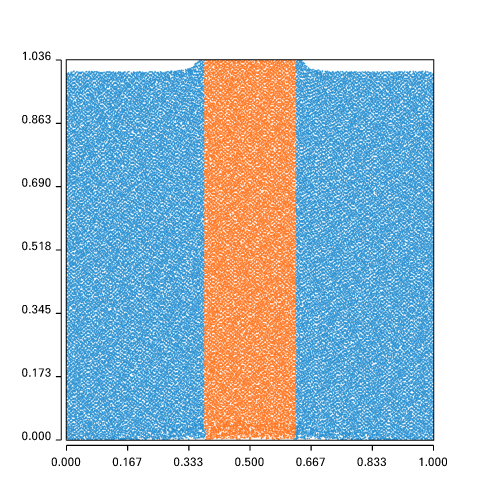

In [9]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelResult_finalstep_light.png")


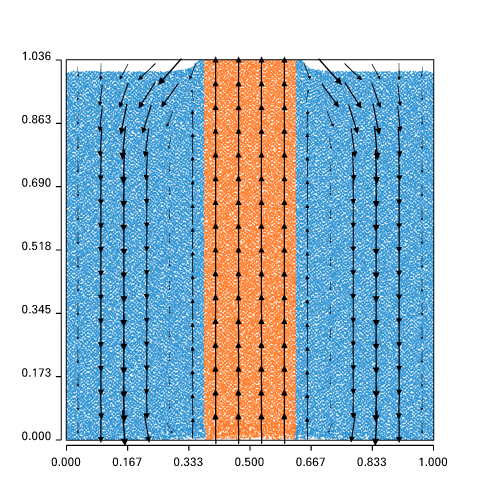

In [10]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_light_mesh.png")

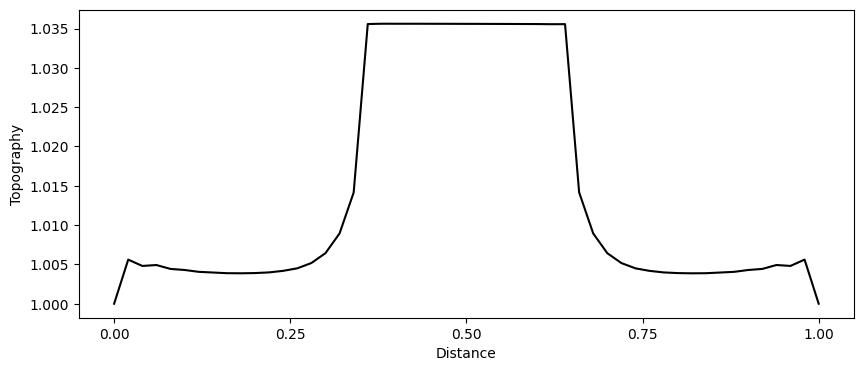

In [11]:
coords = Model.mesh.data[Model.top_wall]
xlim = [0.,0.25,0.5,0.75,1]


import matplotlib.pyplot as plt

Fig, ax1,  = plt.subplots(1,1,figsize=(10,4))

#ax1.set_title("Pressure at bottom")
ax1.set_xlabel('Distance')
ax1.set_ylabel('Topography')
ax1.set_xticks(xlim)

ax1.plot(coords[:,0],coords[:,1],'-', color = 'black')

#ax1.legend(loc='lower right')
#plt.savefig(Model.outputDir+"/Vel-{0}.png".format(Model.checkpointID))


In [ ]:
Model.

In [23]:
1-1*1*1/50/2/2

0.995

In [18]:
0.95*0.25+0.75*1

0.9875

In [12]:
coords[:,1].mean()

1.0140394944703586

In [13]:
1/0.95*0.25+0.75

1.013157894736842

In [19]:
1/0.95

1.0526315789473684

In [14]:
Model.velocityField.evaluate(Model.bottom_wall)

array([[  0.00000000e+00,   0.00000000e+00],
       [ -5.37338530e-06,  -1.61994462e-05],
       [ -8.28074387e-06,  -2.47281901e-05],
       [ -8.57101041e-06,  -3.39957962e-05],
       [ -6.85204486e-06,  -4.09140032e-05],
       [ -5.14072281e-06,  -4.65516295e-05],
       [ -1.57032872e-06,  -5.03203340e-05],
       [  1.13275893e-06,  -5.24266145e-05],
       [  5.39097540e-06,  -5.27573048e-05],
       [  8.37330668e-06,  -5.13198235e-05],
       [  1.25546834e-05,  -4.81269821e-05],
       [  1.51383003e-05,  -4.31564019e-05],
       [  1.85343298e-05,  -3.65256838e-05],
       [  2.01176463e-05,  -2.80649142e-05],
       [  2.18844178e-05,  -1.81115813e-05],
       [  2.16997828e-05,  -6.11148842e-06],
       [  2.04148692e-05,   6.56663232e-06],
       [  1.82567652e-05,   2.31420427e-05],
       [  1.00691190e-05,   3.83153945e-05],
       [ -6.30949552e-07,   4.93265073e-05],
       [ -6.31768520e-07,   4.93135341e-05],
       [ -6.32809404e-07,   4.93004111e-05],
       [ -

In [15]:
Model.velocityField.evaluate(Model.top_wall)

array([[  0.00000000e+00,   0.00000000e+00],
       [ -8.81426936e-07,  -9.91883011e-06],
       [  3.83252616e-06,  -2.10129724e-05],
       [  4.35209812e-06,  -2.51850281e-05],
       [  1.77110605e-06,  -2.68275506e-05],
       [ -1.23427658e-06,  -2.65212593e-05],
       [ -5.15843533e-06,  -2.59273915e-05],
       [ -9.51849246e-06,  -2.51034358e-05],
       [ -1.39964873e-05,  -2.45881013e-05],
       [ -1.87678425e-05,  -2.44565658e-05],
       [ -2.32118670e-05,  -2.49784867e-05],
       [ -2.76330011e-05,  -2.64316530e-05],
       [ -3.13787560e-05,  -2.91443705e-05],
       [ -3.44579819e-05,  -3.38170962e-05],
       [ -3.63895241e-05,  -4.06657244e-05],
       [ -3.50945515e-05,  -5.06756269e-05],
       [ -2.91428333e-05,  -5.93993200e-05],
       [ -9.41210830e-06,  -6.06685984e-05],
       [  3.42183960e-08,   4.86318589e-05],
       [  9.26944897e-08,   4.87979875e-05],
       [  1.20072933e-07,   4.88198731e-05],
       [  1.45591867e-07,   4.88221518e-05],
       [  


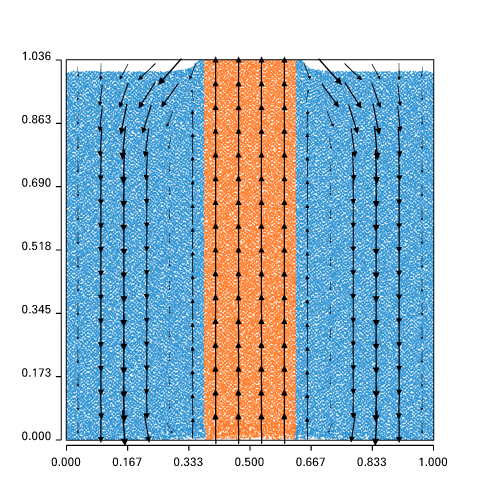

In [16]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_dense_mesh.png")